# Autoregressive Integrated Moving Average (ARIMA)

In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error


In [2]:
import pandas as pd

df=pd.read_csv('day.csv', index_col=1, parse_dates=['dteday'],  header=0)

In [ ]:
#df['DateTime'] = pd.to_datetime(df['dteday'], format='%Y/%m/%d %H:%M')

In [3]:
df.tail()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-03-27,86,2,0,3,0,0,0,2,0.253043,0.250339,0.493913,0.184300,472,1221,1693.0
2011-03-28,87,2,0,3,0,1,1,1,0.264348,0.257574,0.302174,0.212204,222,1806,2028.0
2011-03-29,88,2,0,3,0,2,1,1,0.302500,0.292908,0.314167,0.226996,317,2108,2425.0
2011-03-30,89,2,0,3,0,3,1,2,0.300000,0.297350,0.646667,0.172888,168,1368,1536.0
2011-03-31,90,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685.0


In [14]:
df.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt           float64
dtype: object

In [4]:
cnt=(df['cnt'])
cnt.head()

dteday
2011-01-01     985.0
2011-01-02     801.0
2011-01-03    1349.0
2011-01-04    1562.0
2011-01-05    1600.0
Name: cnt, dtype: float64

Let's perform a quick plot to understand/visualise what the data looks like.

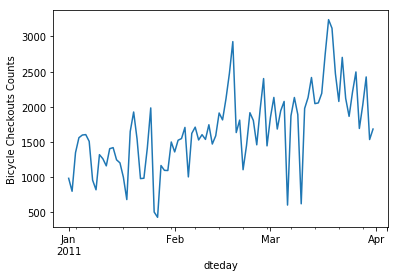

In [15]:
#Plot the graph for the bicycle count
pyplot.ylabel('Bicycle Checkouts Counts')
cnt.plot()
pyplot.show()

There has been a slight increase in trend from the later in January until lae March, however the data is now showing a decrease in trend from end of March onwards.

We can see a general increase in the dataset which we can refer to as a trend.  

This suggests that the time series is not stationary and will require differencing to make it stationary.  
This means we are going to try to take out the trend component: d = 1

## p, d, q (arima parameters)

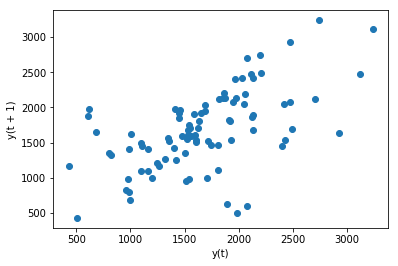

In [16]:
#Do a quick check to see if there is autocorrelation in the data.

from pandas.plotting import lag_plot
lag_plot(cnt)
pyplot.show()

There is a correlation observed, due to clustering of data along the a positive diagnonal line. The corelation might not be strong as there are many data points that are scattered.

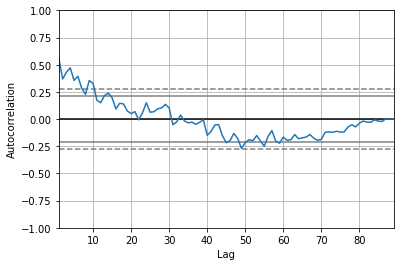

In [11]:
# autocorrelate 
autocorrelation_plot(cnt[1:1000])
pyplot.show()

The auto correlation plot goes in the critical boundary around values 6 to 10.
The value we will experiment with: p = 7

C:\Users\212693013\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


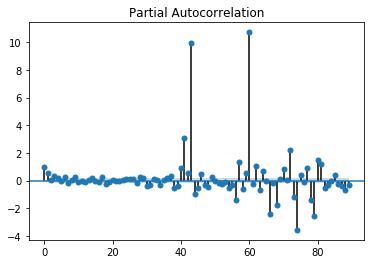

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(cnt)
pyplot.show()

The partial-autocorrelation plot shows that there are 2 lags going beyond the critical range.
The value we will experiment with: q = 2 

Due to a moving timeseries, choose d=1

Get your pdq values to experiment with and fit the model

C:\Users\212693013\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\212693013\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                   89
Model:                 ARIMA(6, 1, 2)   Log Likelihood                -661.702
Method:                       css-mle   S.D. of innovations            401.148
Date:                Fri, 19 Jul 2019   AIC                           1343.404
Time:                        10:12:07   BIC                           1368.291
Sample:                    01-02-2011   HQIC                          1353.435
                         - 03-31-2011                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0525      2.906      4.492      0.000       7.357      18.748
ar.L1.D.cnt     0.0290      0.276      0.105      0.917      -0.512       0.570
ar.L2.D.cnt    -0.0272      0.143     -0.190    

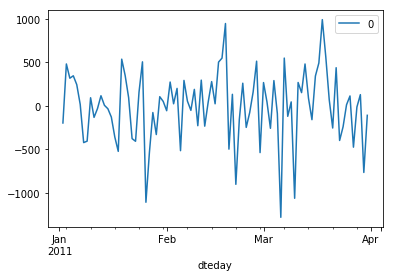

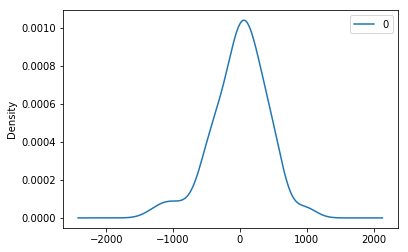

                 0
count    89.000000
mean     -3.108424
std     409.903462
min   -1283.279718
25%    -233.581083
50%      43.173300
75%     269.284586
max     993.006692


In [37]:
# fit the model
#model = ARIMA(cnt, order=(7,1,2)) # first model still showed some trend so we try (6,1,2)
model = ARIMA(cnt, order=(6,1,2)) 
#model = ARIMA(cnt, order=(6,2,2)) # gave a convergence error
#model = ARIMA(cnt, order=(9,1,2)) #Density curve not as smooth as (6, 1, 2), and the plot display a more constant behaviour 
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


Mean value from the combination is closest to 0. Thus is th better model to use

## Rolling Forecast
We now try to use the model to predict future responses.  

C:\Users\212693013\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\212693013\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\212693013\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

predicted=1515.849700, expected=1851.000000
predicted=2052.182269, expected=2134.000000
predicted=1980.299459, expected=1685.000000
predicted=1705.636855, expected=1944.000000
predicted=2139.799330, expected=2077.000000
predicted=1912.430807, expected=605.000000
predicted=1159.169713, expected=1872.000000
predicted=2139.699534, expected=2133.000000
predicted=1655.513576, expected=1891.000000
predicted=1809.604072, expected=623.000000
predicted=1483.716103, expected=1977.000000
predicted=1696.958189, expected=2132.000000
predicted=1737.477808, expected=2417.000000
predicted=1827.870417, expected=2046.000000
predicted=2101.619461, expected=2056.000000
predicted=1756.656589, expected=2192.000000
predicted=2234.213267, expected=2744.000000
predicted=2397.871962, expected=3239.000000
predicted=2721.032103, expected=3117.000000
predicted=2677.886281, expected=2471.000000
predicted=2567.560666, expected=2077.000000
predicted=2532.014705, expected=2703.000000
predicted=2902.034288, expected=21

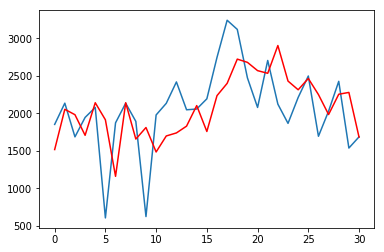

In [38]:
X = cnt.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


The prediction model shows more or less the same trend as the actual model with the correct scale however there is a bit of difference between the two, which means further tuning of p, d, q can be made.